<a href="https://colab.research.google.com/github/ASLManasa/MY_Ml/blob/main/KnearestAlgo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

K can be found out using euclidiean or manhandling
K is the value of how many neighbors to consider k shoud be odd


data set link : https://www.kaggle.com/vinaypratap/knearestneighbor

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
data = pd.read_csv('/content/Classified Data')
data

Unnamed: 0       WTT       PTI  ...       HQE       NXJ  TARGET CLASS
0             0  0.913917  1.162073  ...  0.879422  1.231409             1
1             1  0.635632  1.003722  ...  0.621552  1.492702             0
2             2  0.721360  1.201493  ...  0.957877  1.285597             0
3             3  1.234204  1.386726  ...  1.522692  1.153093             1
4             4  1.279491  0.949750  ...  1.463812  1.419167             1
..          ...       ...       ...  ...       ...       ...           ...
995         995  1.010953  1.034006  ...  1.117340  1.348517             1
996         996  0.575529  0.955786  ...  0.958684  1.663489             0
997         997  1.135470  0.982462  ...  0.919191  1.385504             1
998         998  1.084894  0.861769  ...  1.277456  1.188063             1
999         999  0.837460  0.961184  ...  1.257190  1.364837             1

[1000 rows x 12 columns]

In [ ]:
data.head()

Unnamed: 0       WTT       PTI  ...       HQE       NXJ  TARGET CLASS
0           0  0.913917  1.162073  ...  0.879422  1.231409             1
1           1  0.635632  1.003722  ...  0.621552  1.492702             0
2           2  0.721360  1.201493  ...  0.957877  1.285597             0
3           3  1.234204  1.386726  ...  1.522692  1.153093             1
4           4  1.279491  0.949750  ...  1.463812  1.419167             1

[5 rows x 12 columns]

Standardiation using Standard Scaler :
Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual features do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance).


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit(data.drop('TARGET CLASS',axis=1))

In [ ]:
scaled_features = scaler.transform(data.drop('TARGET CLASS',axis=1))
data_feat = pd.DataFrame(scaled_features,columns=data.columns[:-1])
data_feat.head()

In [ ]:
import seaborn as sns


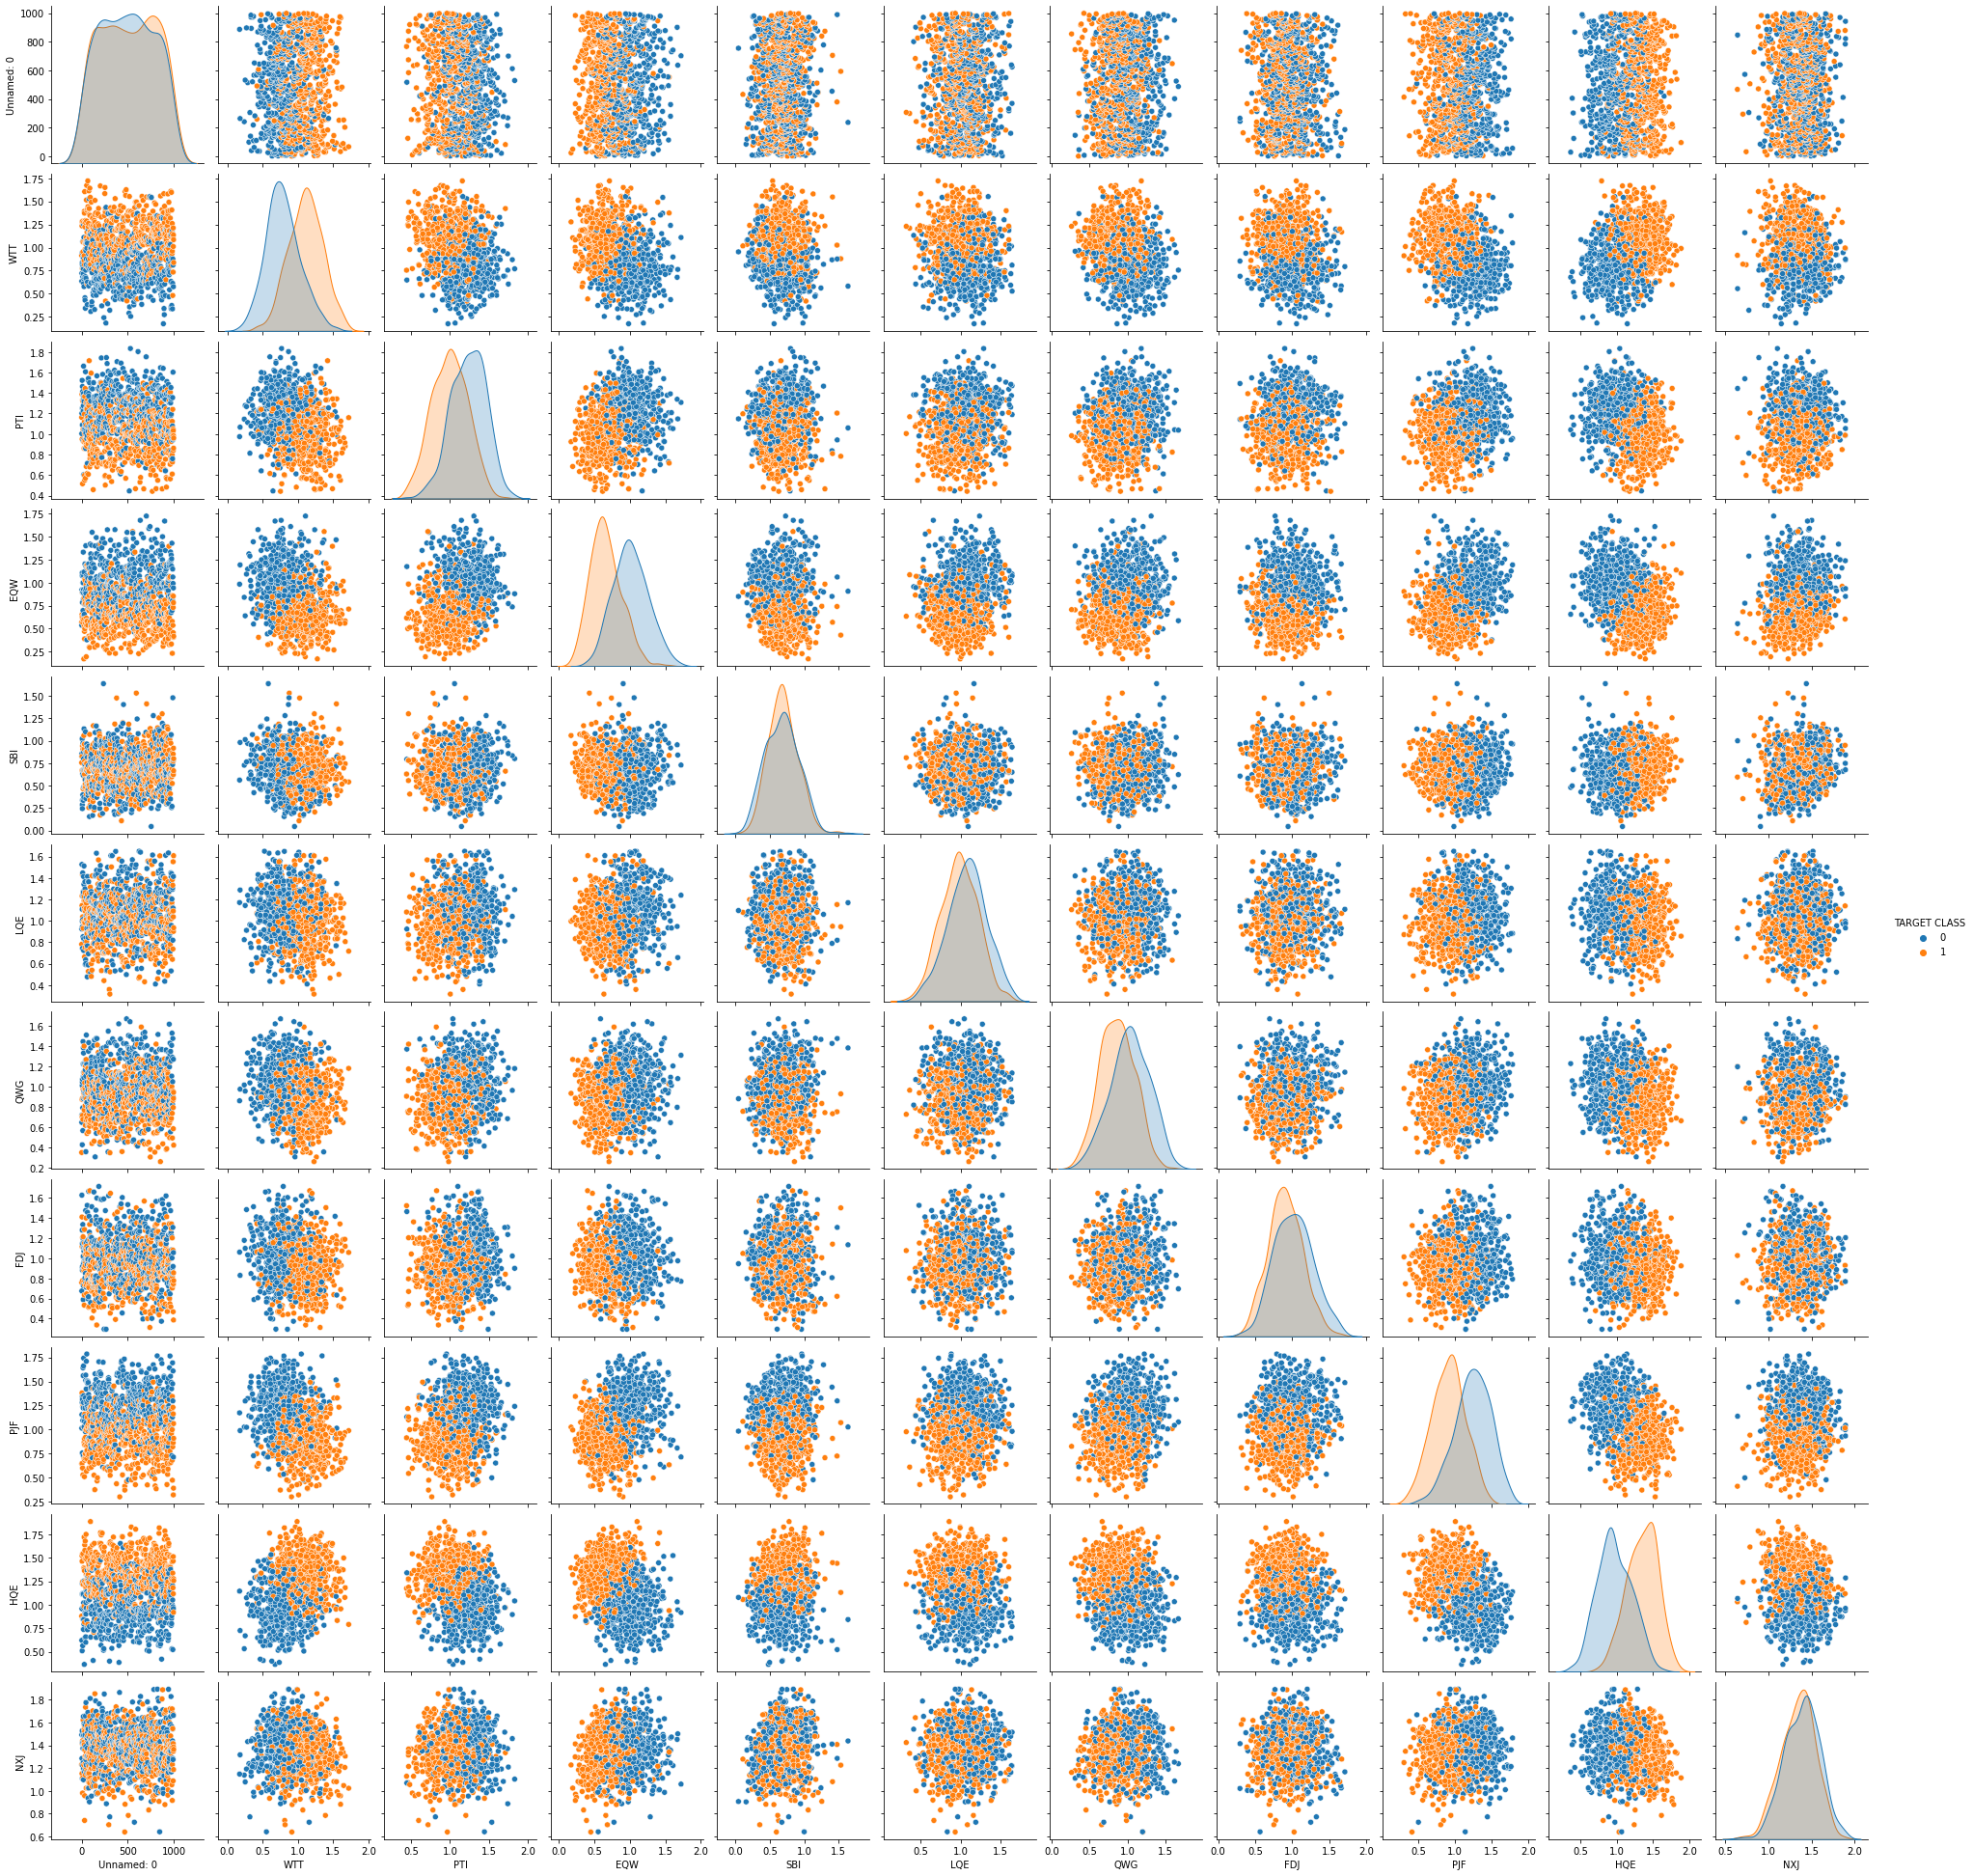

In [ ]:
sns.pairplot(data, hue='TARGET CLASS')

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['TARGET CLASS'],
                                                    test_size=0.30)

In [34]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=1)


In [ ]:
knn.fit(X_train,y_train)

In [38]:
pred = knn.predict(X_test)

In [40]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import cross_val_score

In [41]:
print(confusion_matrix(y_test,pred))


[[129  19]
 [ 12 140]]


In [42]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.91      0.87      0.89       148
           1       0.88      0.92      0.90       152

    accuracy                           0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300



In [46]:

accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,data_feat,data['TARGET CLASS'],cv=10)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Error Rate')

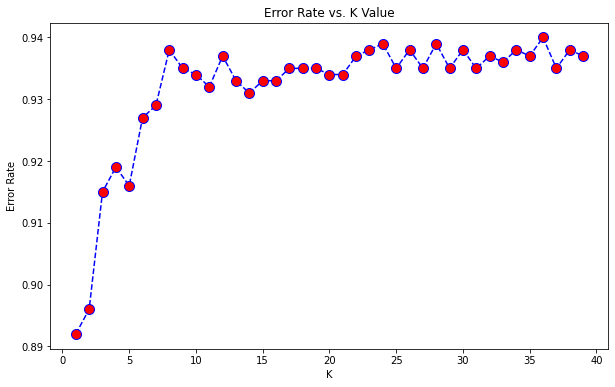

In [47]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
  #       markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [48]:
# NOW WITH K=23
knn = KNeighborsClassifier(n_neighbors=23)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=23')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=23


[[136  12]
 [  9 143]]


              precision    recall  f1-score   support

           0       0.94      0.92      0.93       148
           1       0.92      0.94      0.93       152

    accuracy                           0.93       300
   macro avg       0.93      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300

